# 27 Opening OBJ and DXF Files with PyVista in GemGIS

OBJ and DXF Files can be opened with GemGIS and visualized with PyVista. 



<img src="../images/tutorial27_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/27_opening_obj_and_dxf_files/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="27_opening_obj_and_dxf_files.zip", dirpath=file_path)

## Loading OBJ File using PyVista

The obj file can easily be loaded and plotted using PyVista.

In [3]:
import pyvista as pv

mesh = pv.read(file_path + 'Channel.obj')
mesh

PolyData (0x23de4877d00)
  N Cells:	49152
  N Points:	196608
  N Strips:	0
  X Bounds:	-1.576e+00, 2.530e+00
  Y Bounds:	-9.167e-01, 1.000e+00
  Z Bounds:	-1.000e+00, 9.751e+00
  N Arrays:	6

## Plotting the mesh using PyVista

The loaded mesh can be plotted using PyVista again.

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


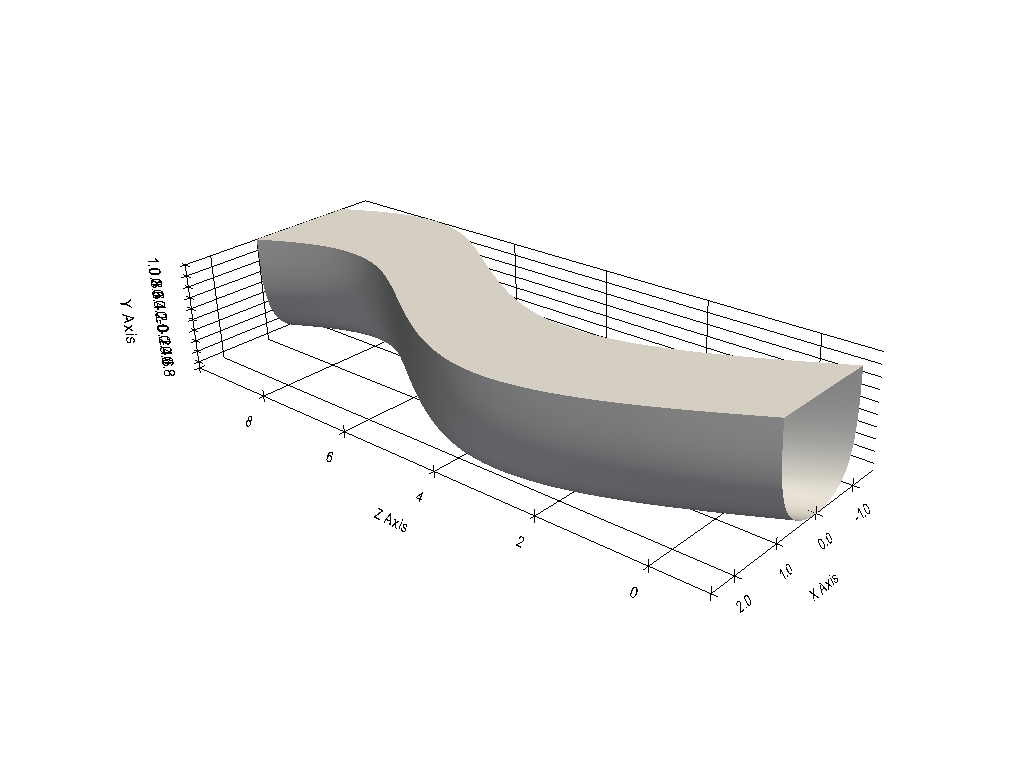

In [4]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh,scalar_bar_args=sargs)

p.camera_position=[(15.33958702947096, 9.654312885616765, -9.581353852513592),
 (0.5404866466699564, -0.29141440140763164, 4.2033639107058445),
 (-0.3459193991987702, 0.8968436300281839, 0.2757014191763108)]

p.set_background('white')
p.show_grid(color='black')
p.show()

## Loading the DXF File using GeoPandas

DXF Files can be loaded using GeoPandas. The faces are then stored as ``POLYGON Z`` objects containing not only the X and Y values but also a Z value. Each polygon is made of 3 vertices of which the start and endpoint are identical (3 different vertices). In order to build the mesh, the vertices need to be extracted. The faces are equal to the single polygons.

In [5]:
import geopandas as gpd

gdf = gpd.read_file(file_path + 'Channel.dxf')
gdf.drop(['Layer', 'PaperSpace','SubClasses','Linetype', 'EntityHandle', 'Text'], axis=1).head()

,geometry
0,"POLYGON Z ((1.00869 0.92852 1.00000, 0.97744 0..."
1,"POLYGON Z ((1.00869 0.92852 1.00000, 1.01735 0..."
2,"POLYGON Z ((0.97744 0.92853 1.00000, 0.94619 0..."
3,"POLYGON Z ((0.97744 0.92853 1.00000, 0.98610 0..."
4,"POLYGON Z ((0.94619 0.92853 1.00000, 0.91494 0..."


### Inspecting the Geometries

Each geometry object is a polygon consisting of three unique vertices.

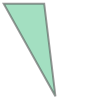

In [6]:
gdf.loc[0].geometry

In [7]:
type(gdf.loc[0].geometry)

shapely.geometry.polygon.Polygon

In [8]:
gdf.loc[0].geometry.wkt

'POLYGON Z ((1.0086873769760132 0.9285249710083008 1, 0.9774374961853027 0.9285261631011963 1, 1.0173505544662476 0.8570554852485657 1.0000001192092896, 1.0086873769760132 0.9285249710083008 1))'

### Extracting XYZ Coordinates of Polygons

The coordinates for each vertex of each Polygon can be extracted using the regular ``extract_xy(..)`` function again. The function was adapted to also work with geometries containing a Z component. 

In [9]:
gdf_lines = gg.vector.extract_xy(gdf)
gdf_lines.head()

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,X,Y,Z
0,0,None,None,None,None,None,POINT (1.00869 0.92852),1.01,0.93,1.00
1,0,None,None,None,None,None,POINT (0.97744 0.92853),0.98,0.93,1.00
2,0,None,None,None,None,None,POINT (1.01735 0.85706),1.02,0.86,1.00
3,0,None,None,None,None,None,POINT (1.00869 0.92852),1.01,0.93,1.00
4,0,None,None,None,None,None,POINT (1.00869 0.92852),1.01,0.93,1.00


### Showing vertices

The vertices to create a mesh are equal to the X, Y and Z values of the GeoDataFrame as NumPy array.

In [10]:
vertices = gdf_lines[['X', 'Y', 'Z']].values
vertices

array([[ 1.00868738,  0.92852497,  1.        ],
       [ 0.9774375 ,  0.92852616,  1.        ],
       [ 1.01735055,  0.85705549,  1.00000012],
       ...,
       [ 0.24864995, -7.21182299, -0.65079874],
       [ 0.23326781, -7.21196413, -0.66666669],
       [ 0.25142166, -7.16530943, -0.66666669]])

### Showing Faces

The faces for the mesh are equal to the indices of the single points within the GeoDataFrame in the needed VTK format.

In [11]:
import numpy as np
faces = np.pad(np.arange(0,len(gdf_lines[['X', 'Y', 'Z']].values)).reshape(int(len(gdf_lines[['X', 'Y', 'Z']].values)/4), 4), ((0, 0), (1, 0)), 'constant', constant_values=4)
faces

array([[     4,      0,      1,      2,      3],
       [     4,      4,      5,      6,      7],
       [     4,      8,      9,     10,     11],
       ...,
       [     4, 393204, 393205, 393206, 393207],
       [     4, 393208, 393209, 393210, 393211],
       [     4, 393212, 393213, 393214, 393215]])

### Creating PolyData

A PyVista PolyData dataset can easily be created with the vertices and faces.

In [12]:
poly = pv.PolyData(vertices, faces)
poly

PolyData,Information
N Cells,98304
N Points,393216
N Strips,0
X Bounds,"-1.576e+00, 2.530e+00"
Y Bounds,"-9.751e+00, 1.000e+00"
Z Bounds,"-9.167e-01, 1.000e+00"
N Arrays,0


### Plotting the mesh

As usual, the mesh can be plotted using PyVista.

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


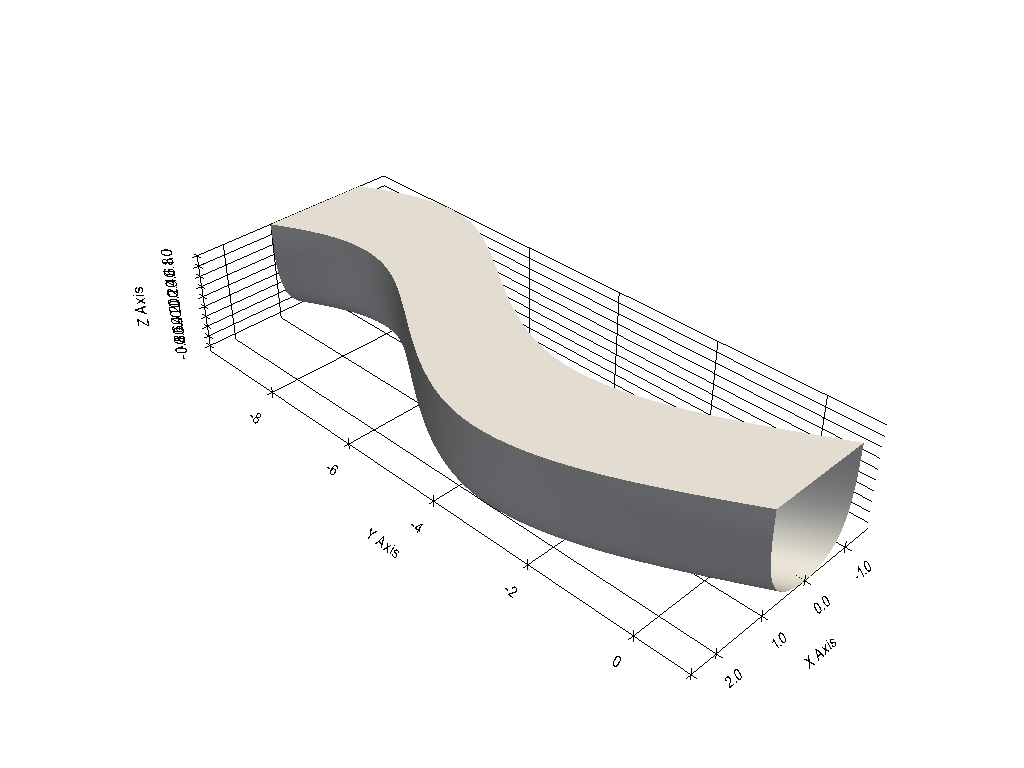

In [13]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(poly,scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

## Using the built-in GemGIS Function

The PolyData dataset can also be created using the built-in GemGIS function ``create_polydata_from_dxf(...)``.

In [14]:
poly = gg.visualization.create_polydata_from_dxf(gdf=gdf)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


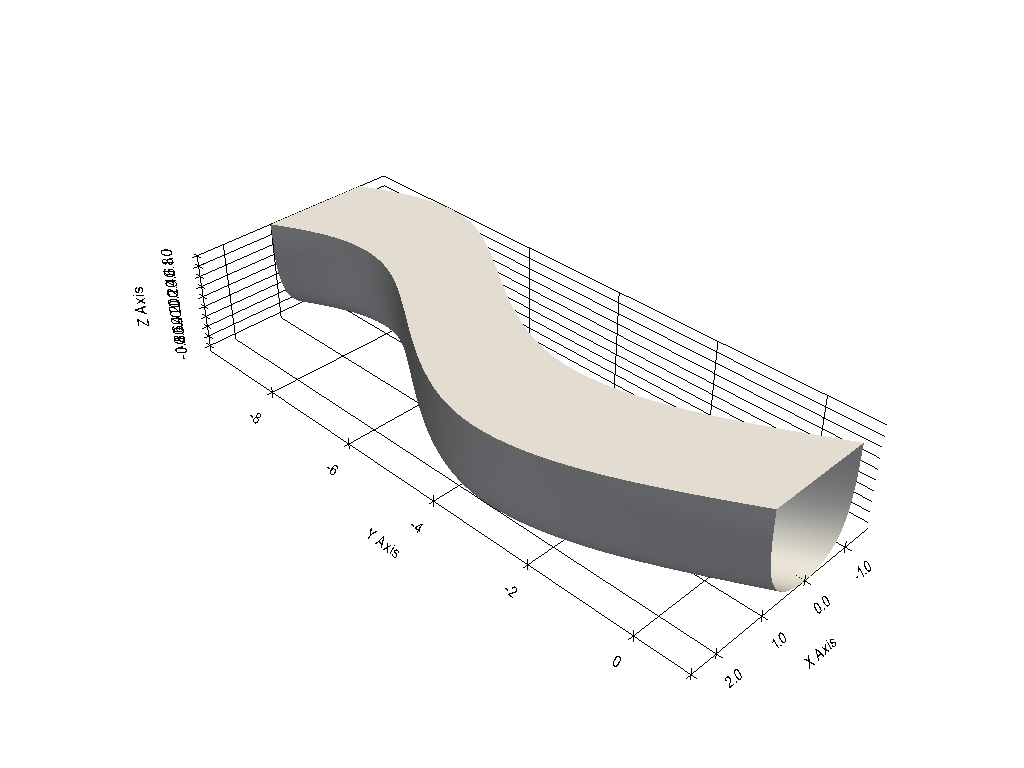

In [15]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(poly,scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()